In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from read_yse_ztf_snana import read_YSE_ZTF_snana_dir as snana

In [6]:
full_snid_list, full_meta_list, full_df_list = snana("Type II")

~~at least some points before peak mag~~

~~at least 7 points in lightcurve~~
    
~~signal to noise < .2~~ 

In [7]:
first_cut = []
for objectID in full_meta_list:
    if objectID['nobs_before_peak'] > 0:
        if objectID['nobs_before_peak'] + objectID['nobs_after_peak'] >= 7:
            first_cut.append(objectID['object_id'])
first_cut

['2019ppi',
 '2019uez',
 '2019wmr',
 '2020aafm',
 '2020abah',
 '2020absk',
 '2020aczd',
 '2020aeeg',
 '2020aeqx',
 '2020ama',
 '2020awg',
 '2020azh',
 '2020dbd',
 '2020eaf',
 '2020ej',
 '2020fc',
 '2020gcv',
 '2020ghq',
 '2020hgw',
 '2020hrw',
 '2020jfo',
 '2020jww',
 '2020kpz',
 '2020lfi',
 '2020lrr',
 '2020mks',
 '2020nim',
 '2020ofw',
 '2020ovk',
 '2020qmo',
 '2020rhg',
 '2020rth',
 '2020scq',
 '2020shf',
 '2020tfb',
 '2020thx',
 '2020tly',
 '2020tzs',
 '2020uwl',
 '2020vdk',
 '2020ykb',
 '2020ytg',
 '2020zx',
 '2021aaej',
 '2021aceh',
 '2021acey',
 '2021acfc',
 '2021achy',
 '2021aff',
 '2021alq',
 '2021arg',
 '2021bwv',
 '2021gdz',
 '2021hud',
 '2021hxv',
 '2021ihp',
 '2021inc',
 '2021joz',
 '2021krc',
 '2021nip',
 '2021nue',
 '2021pj',
 '2021qes',
 '2021qzi',
 '2021rem',
 '2021sev',
 '2021skm',
 '2021ukf',
 '2021vrt',
 '2021wjs',
 '2021wlr',
 '2021wvw',
 '2021xbf',
 '2021zzv']

removed the following objects:
20abjq, 20acun, 20pni, 20svn, 20tan, 20tlf, 20xua, 21aaqn, 21btn, 21dbg, 21qvr, 21vgn


74 objects remain in the sample

C:\Users\JV\AppData\Local\Temp\ipykernel_22952\3719606857.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(idx)


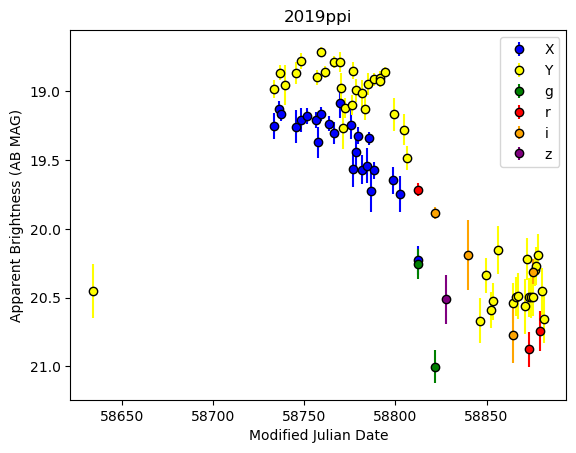

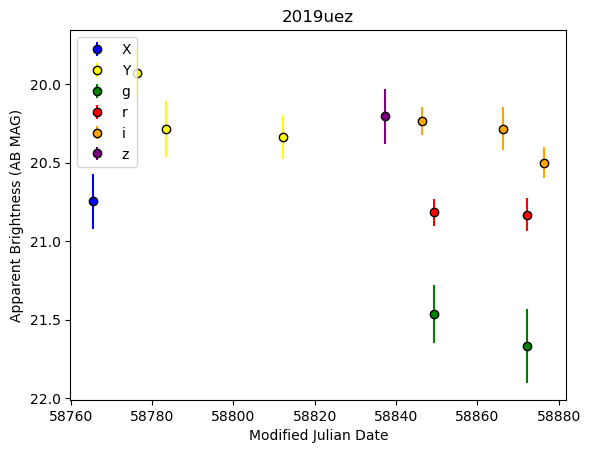

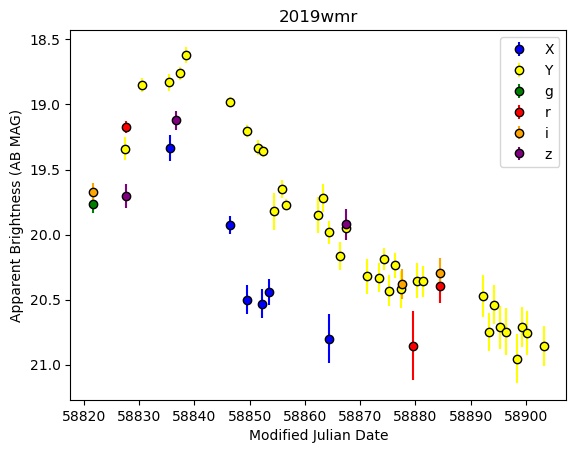

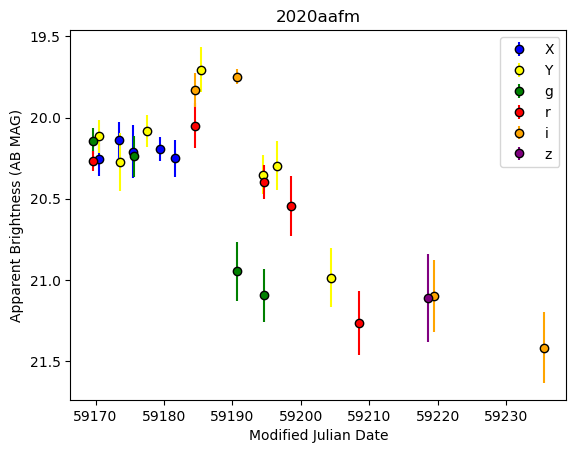

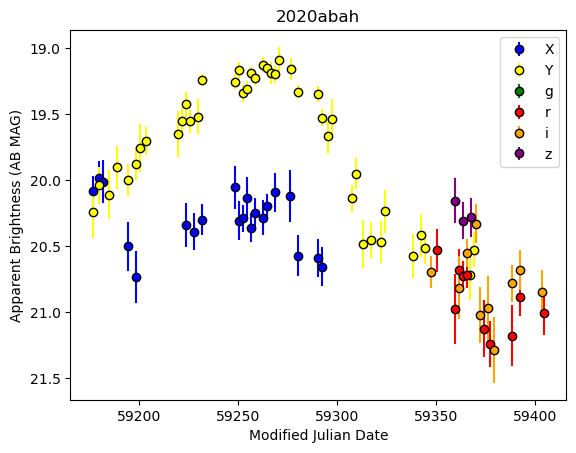

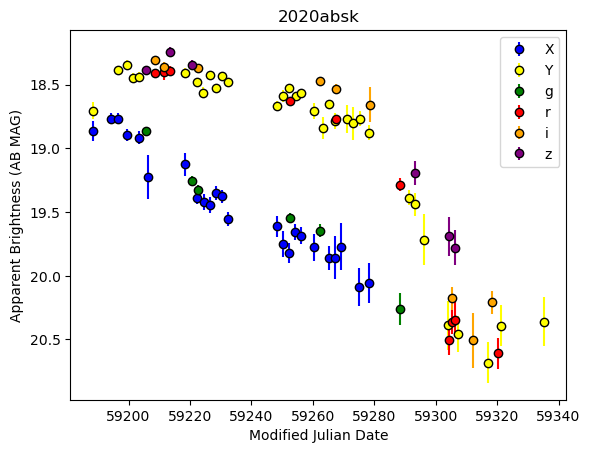

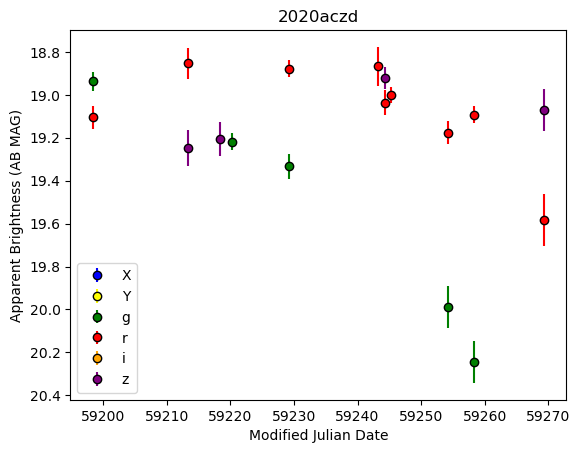

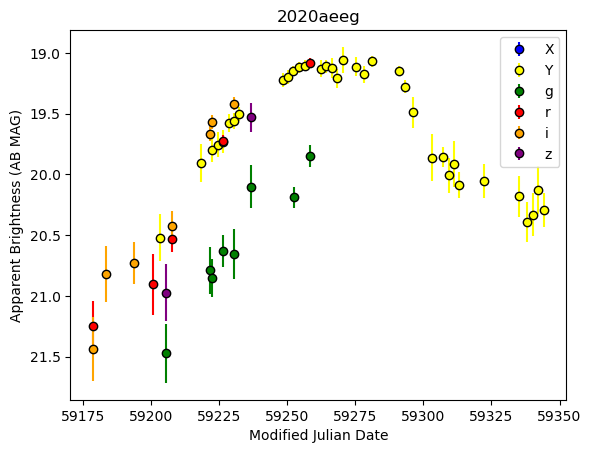

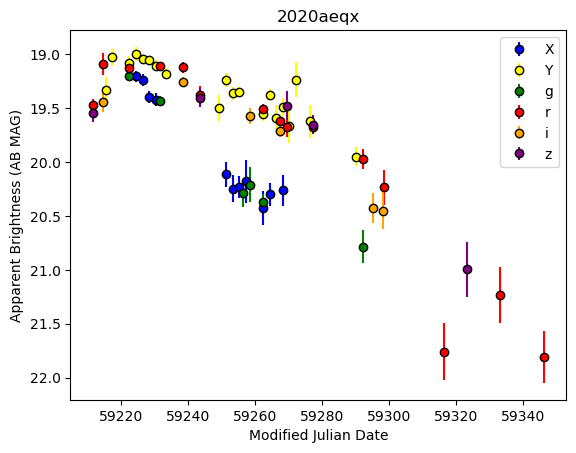

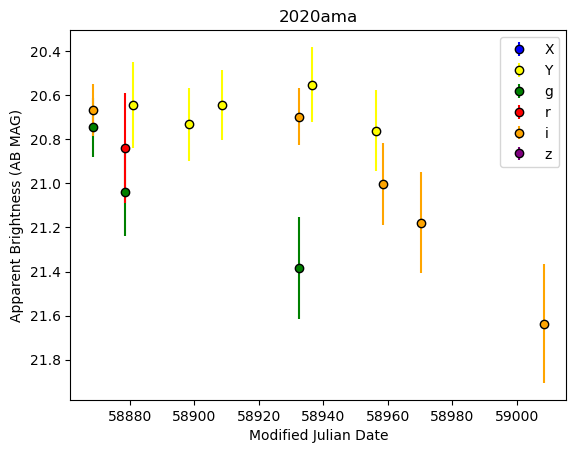

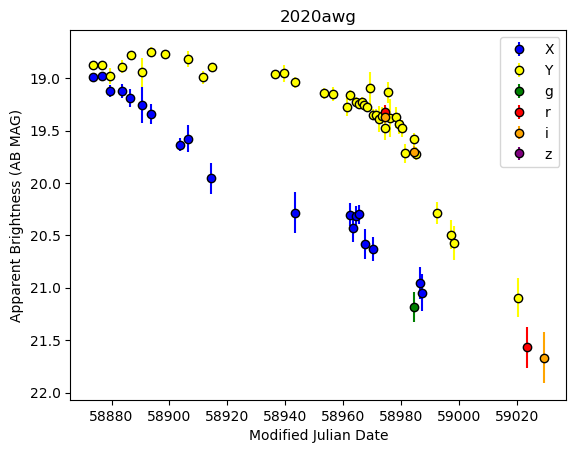

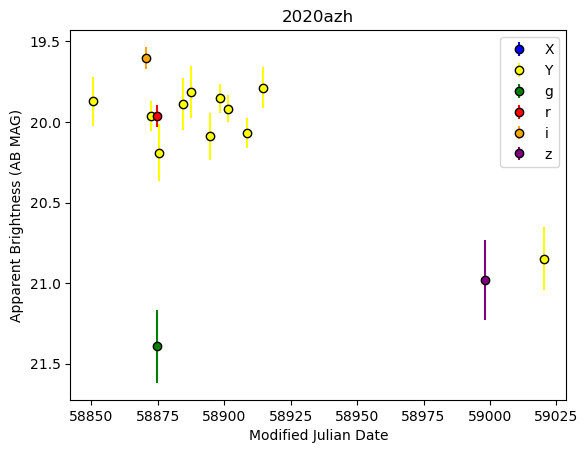

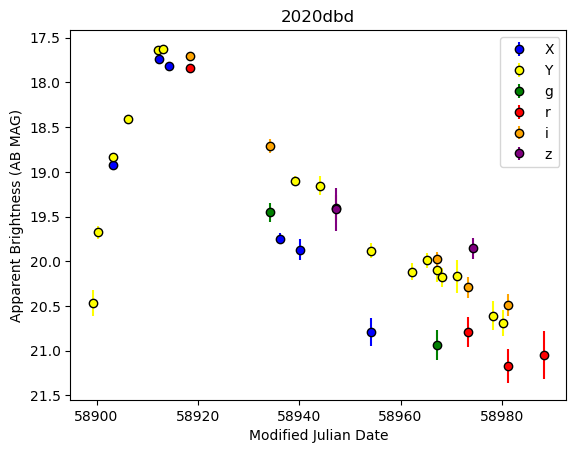

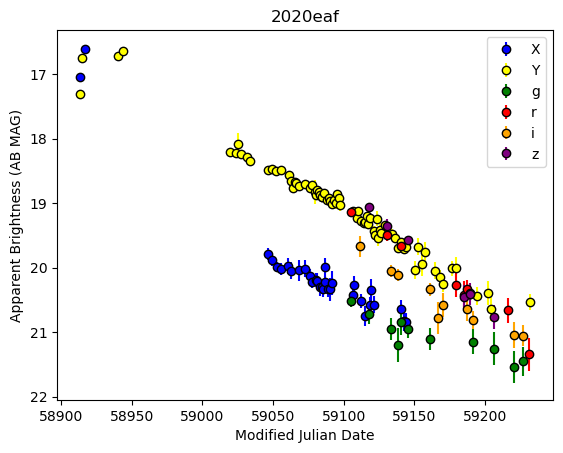

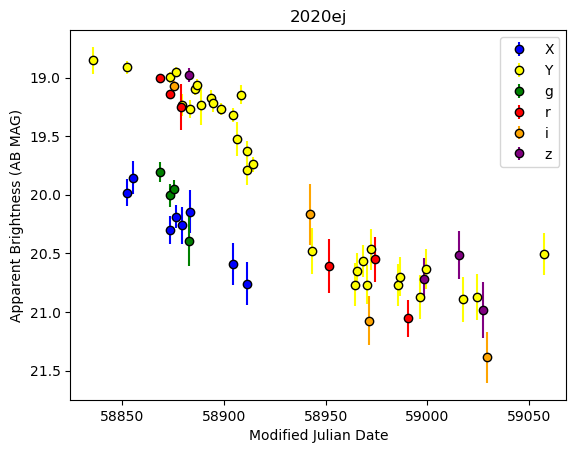

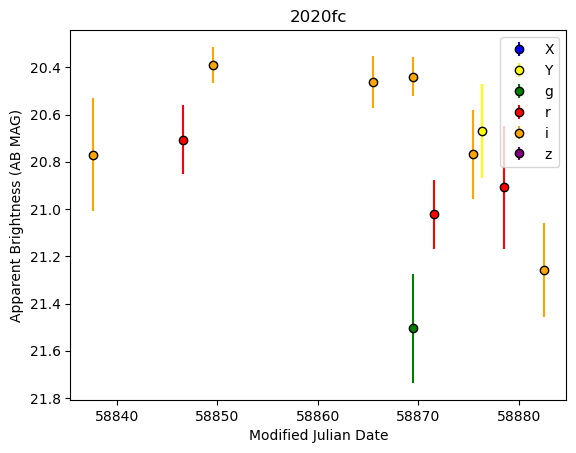

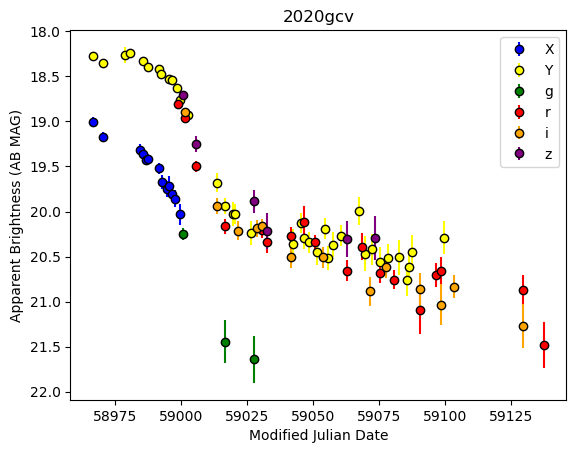

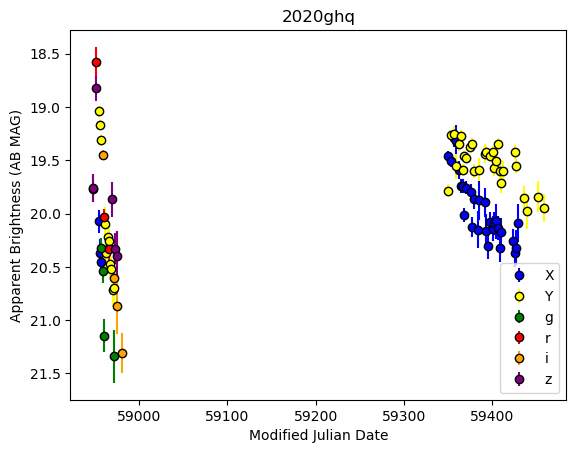

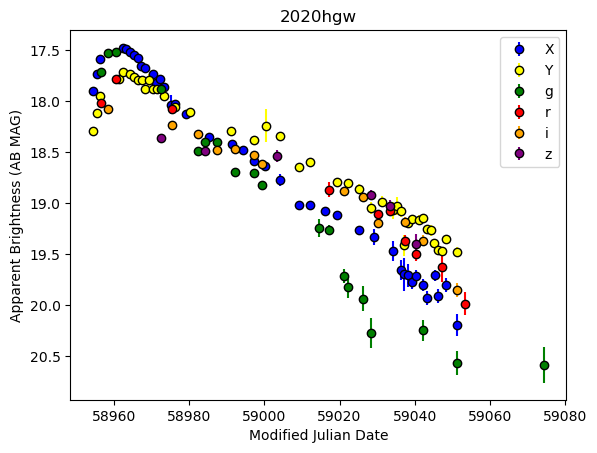

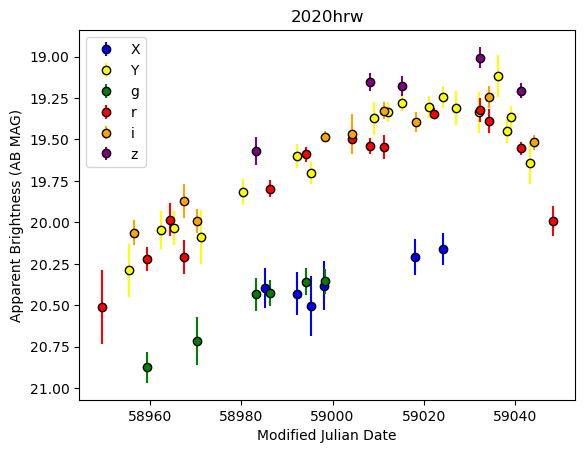

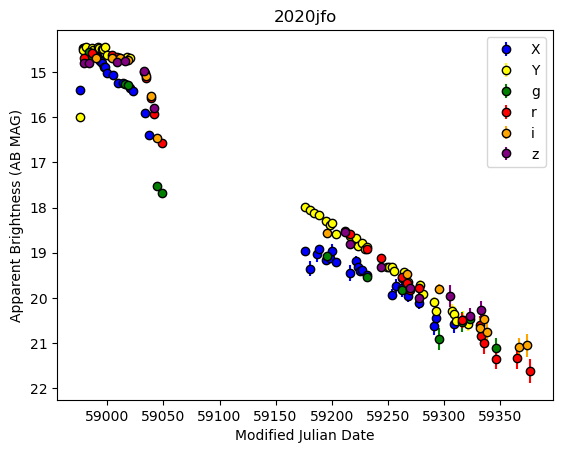

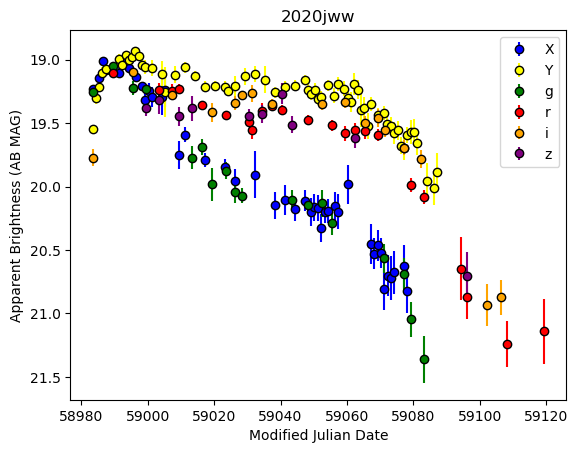

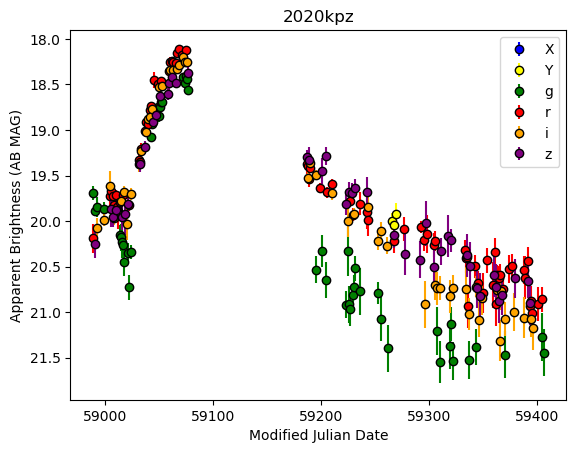

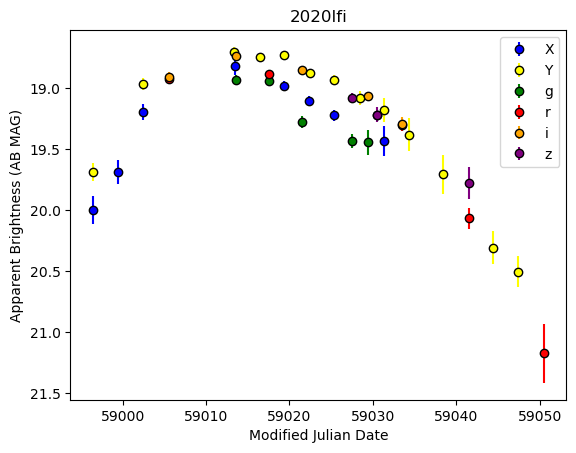

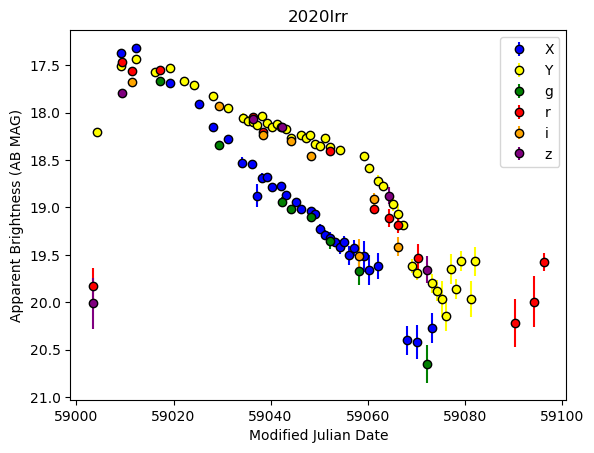

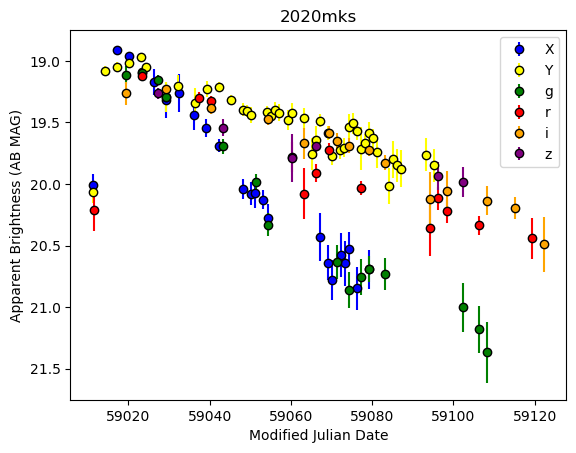

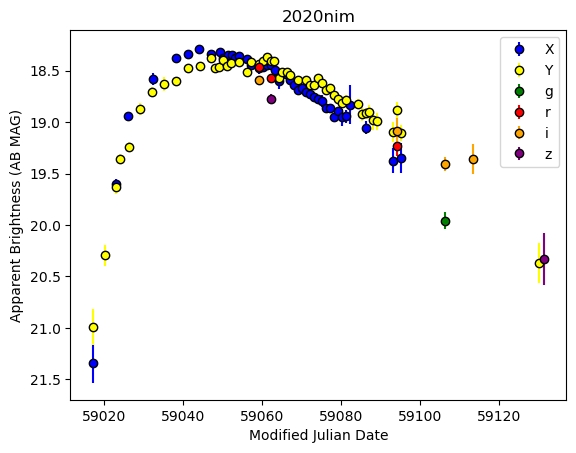

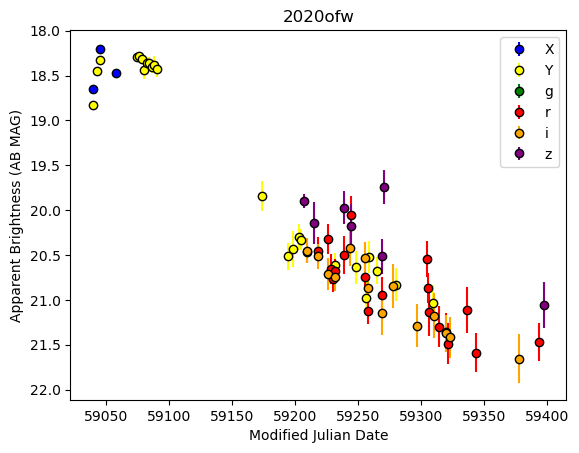

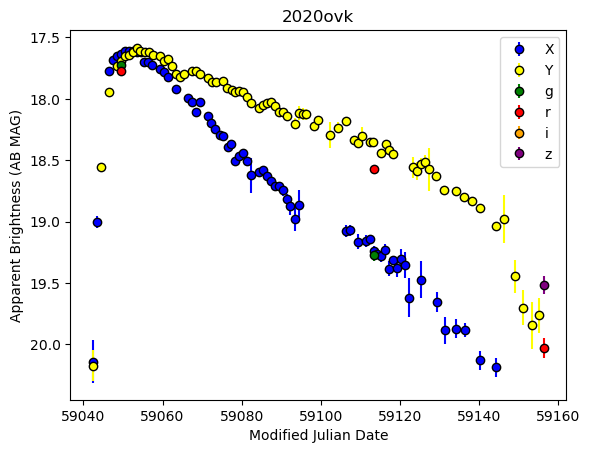

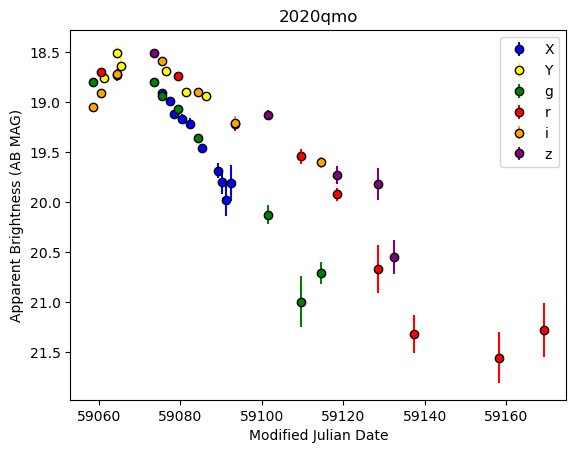

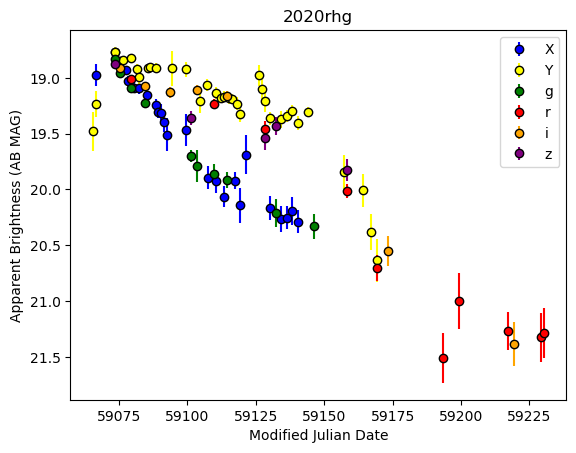

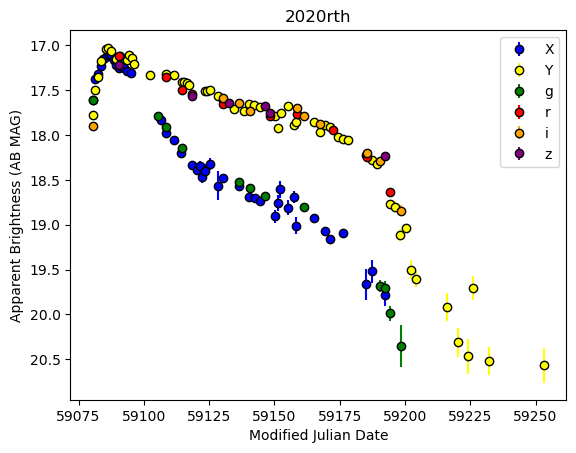

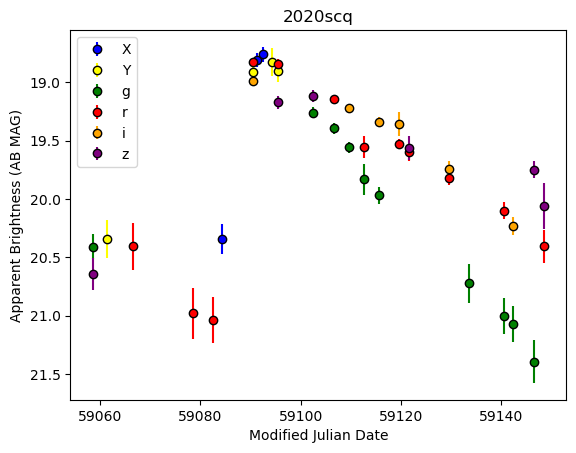

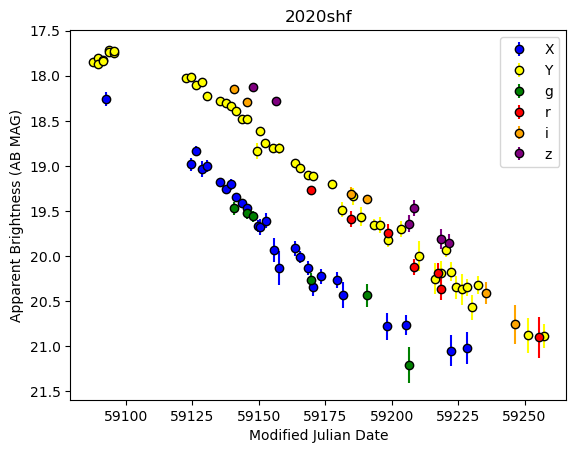

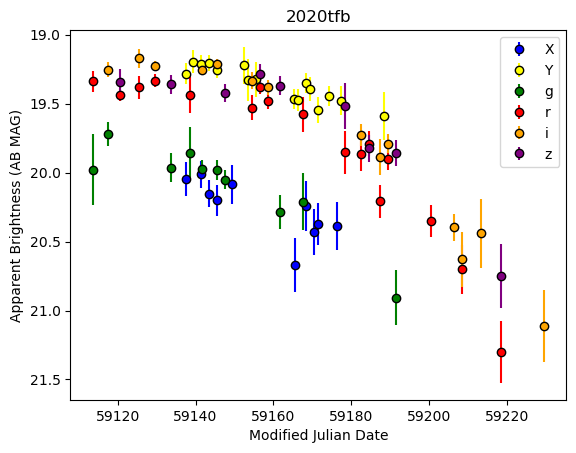

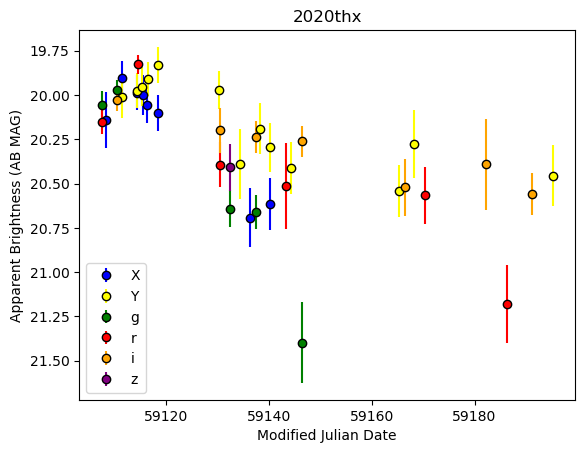

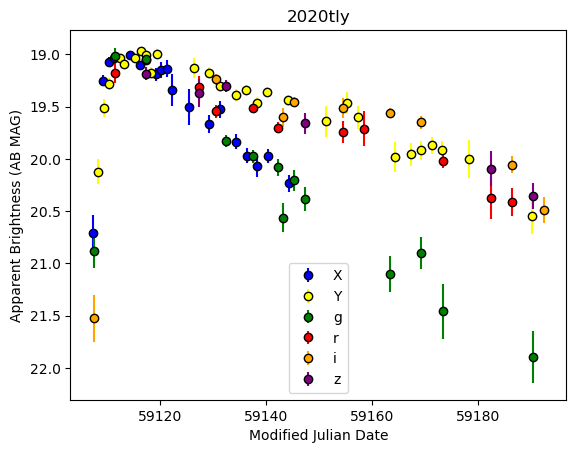

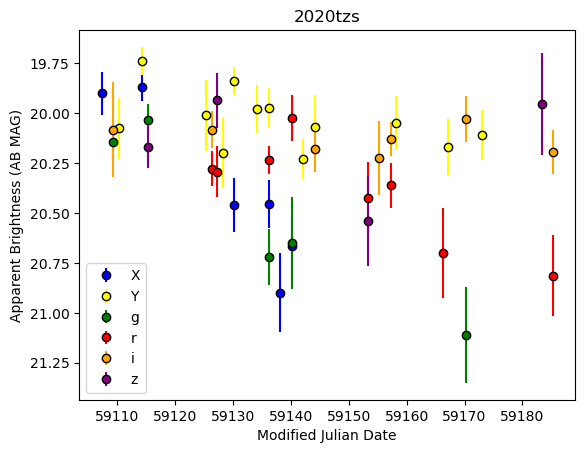

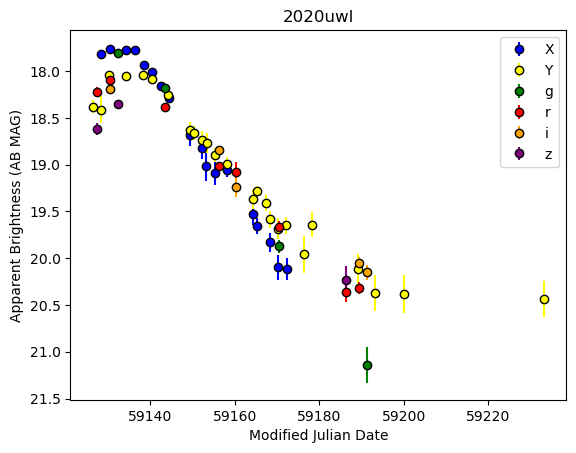

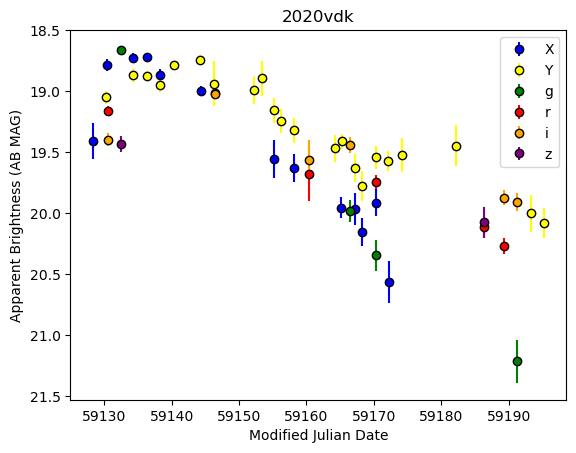

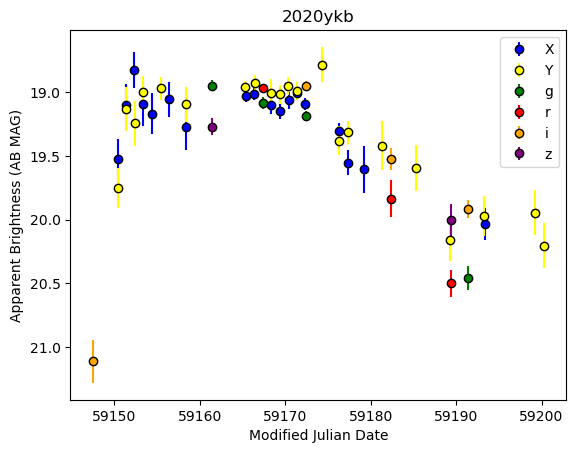

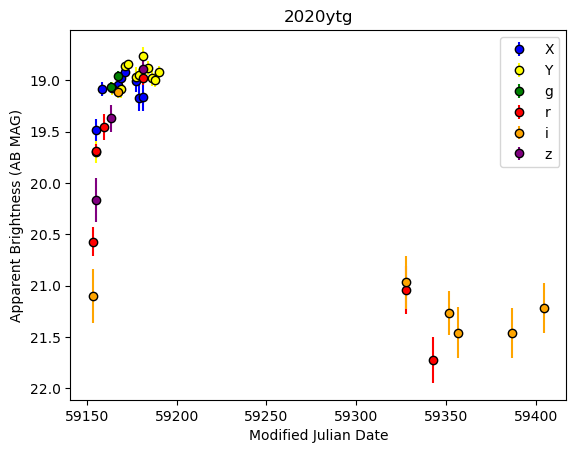

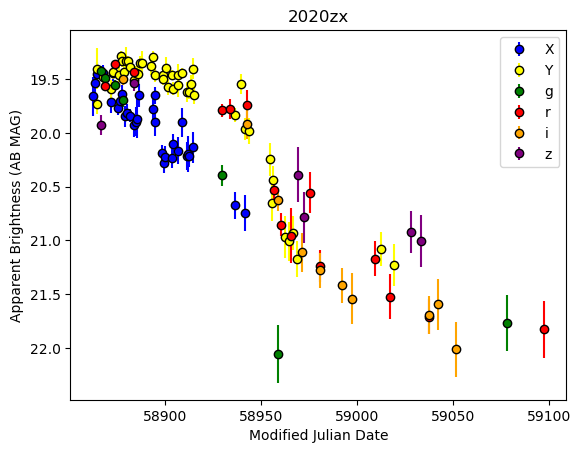

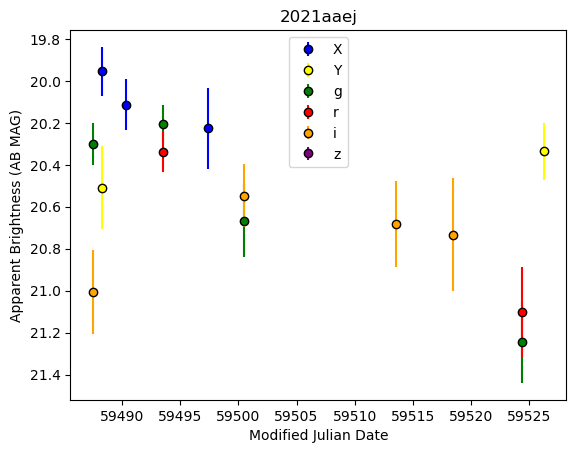

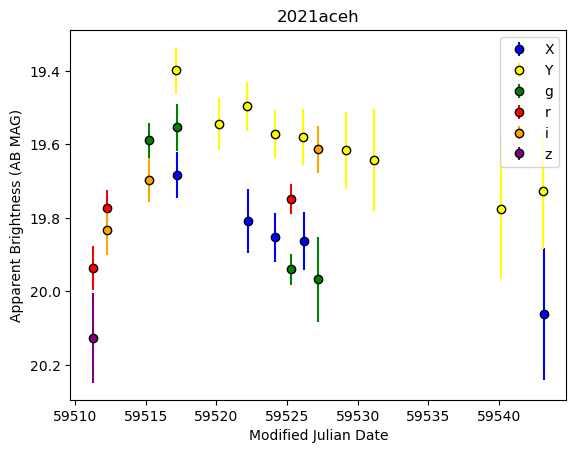

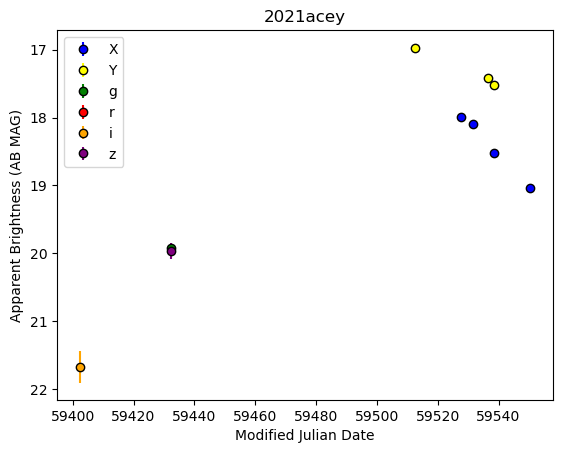

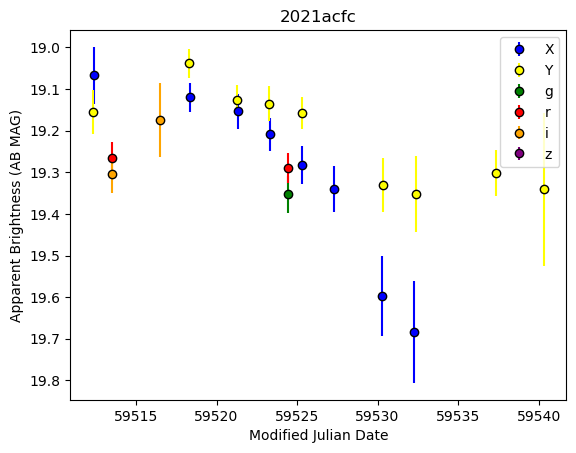

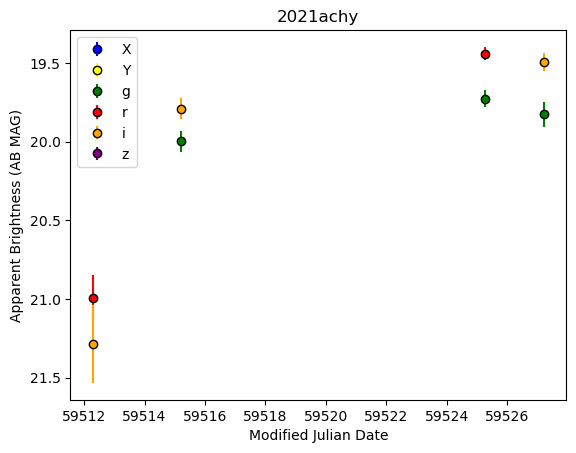

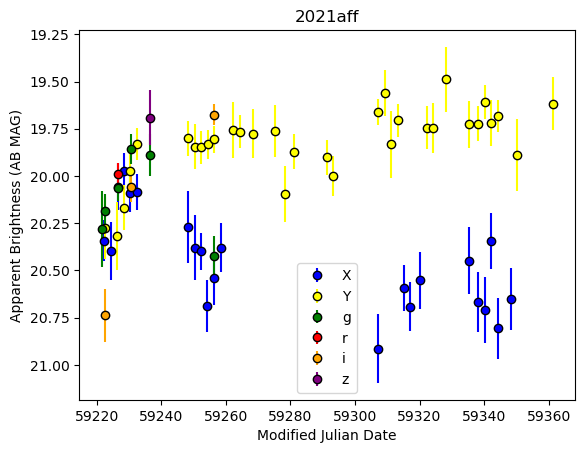

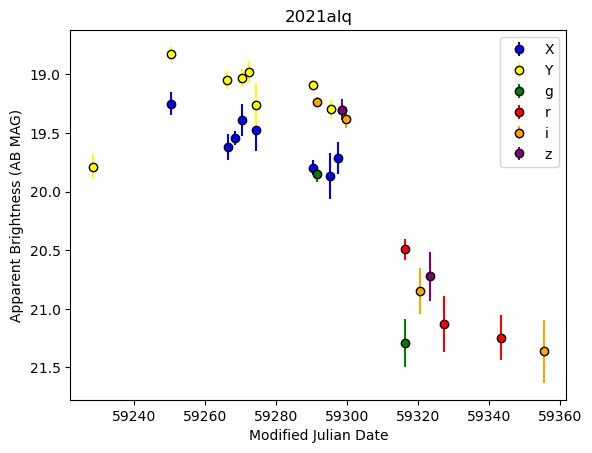

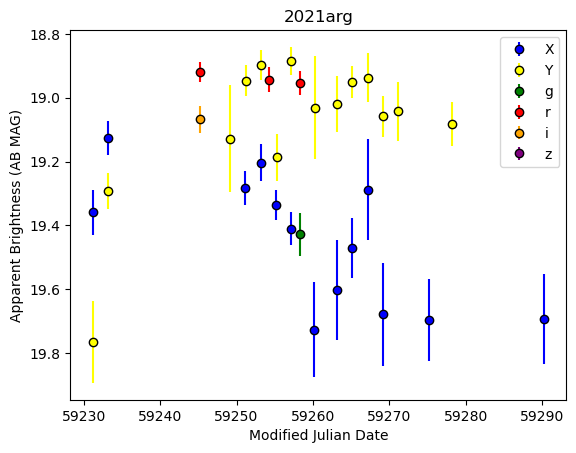

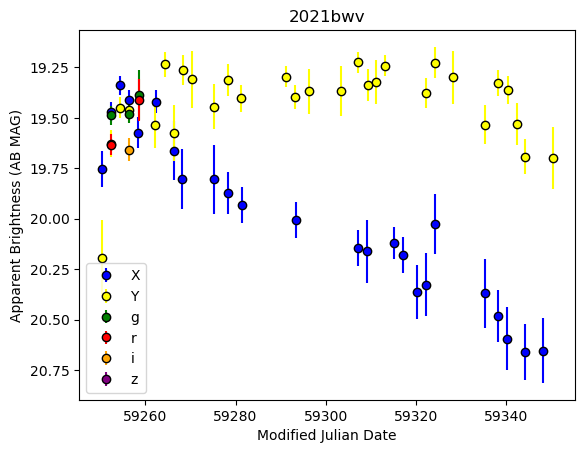

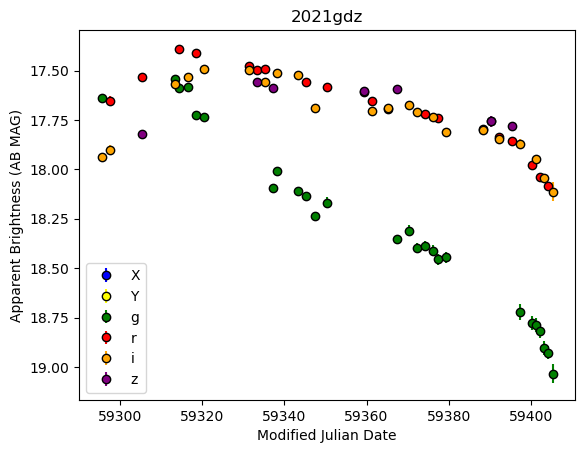

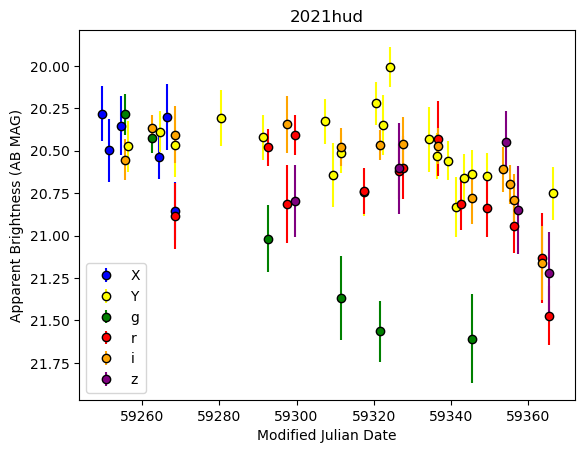

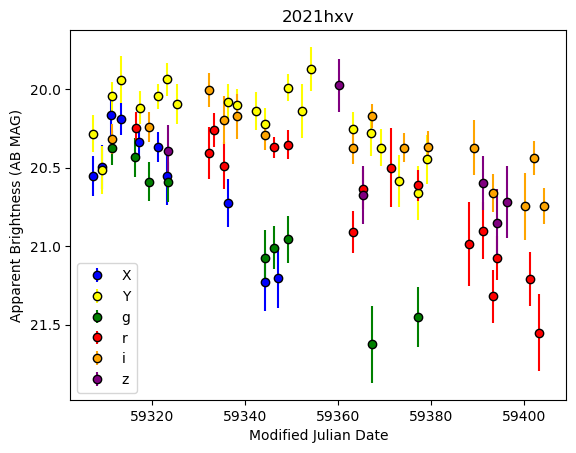

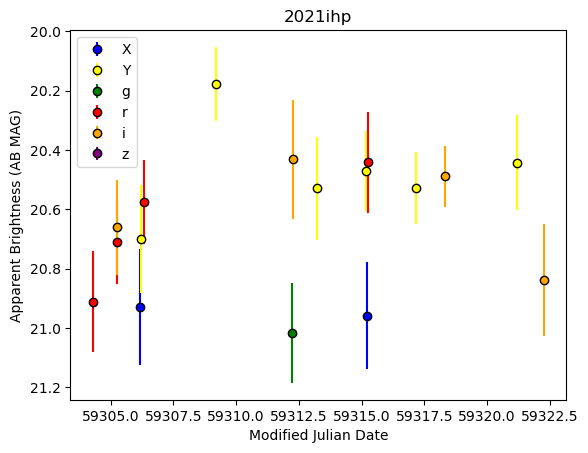

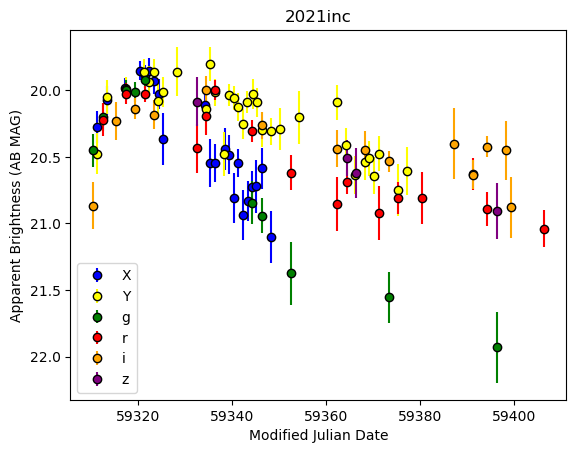

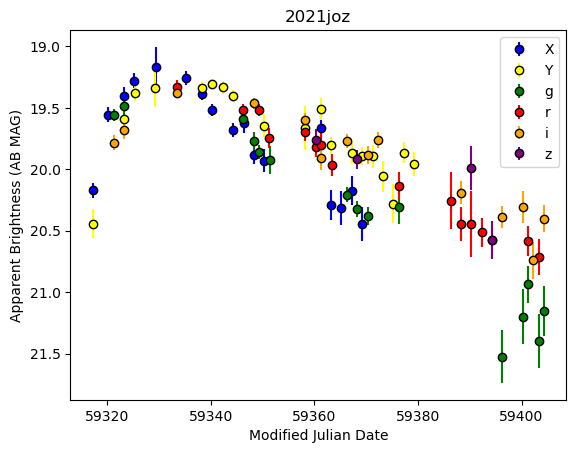

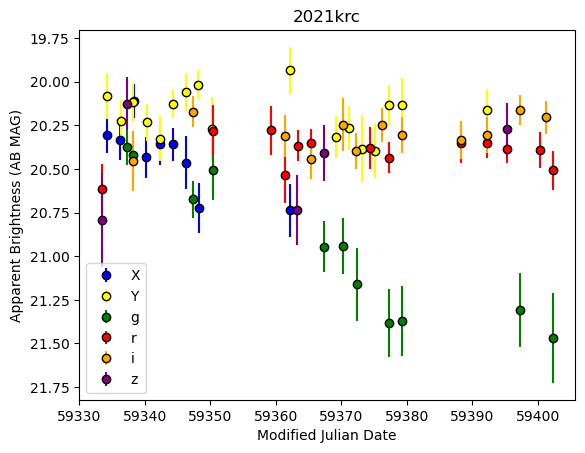

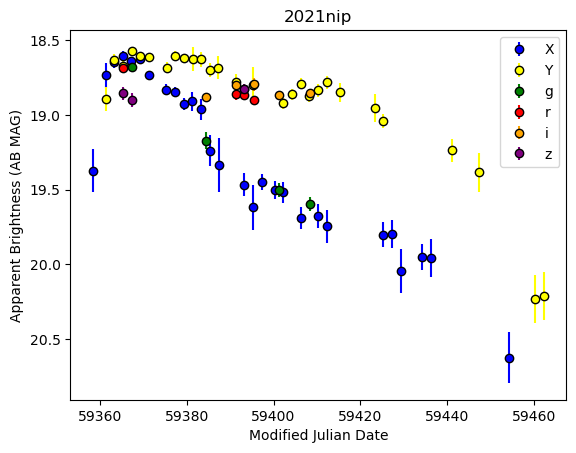

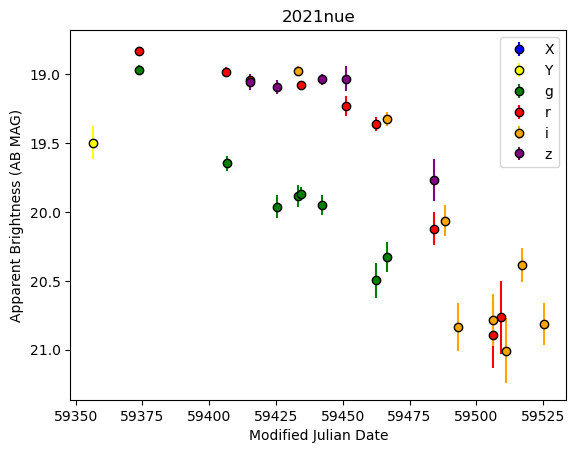

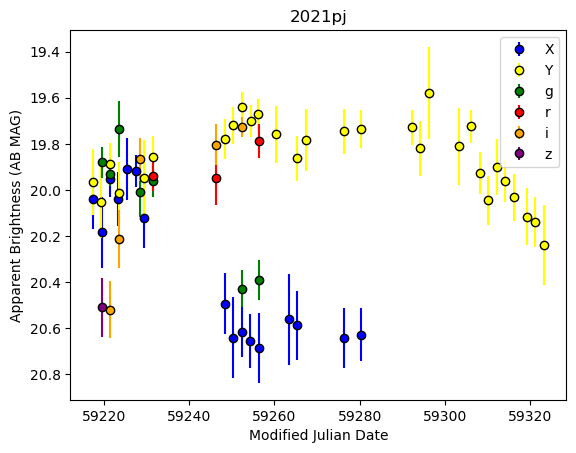

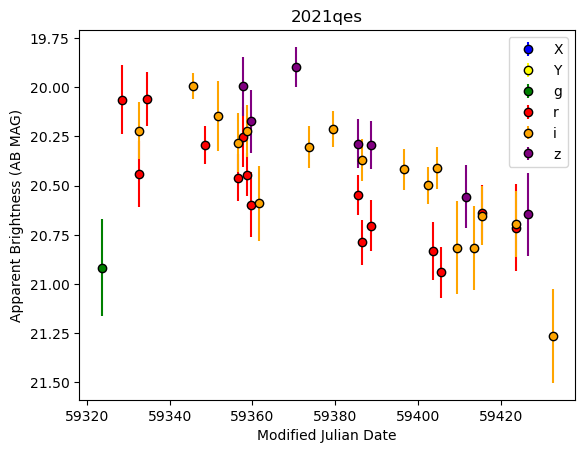

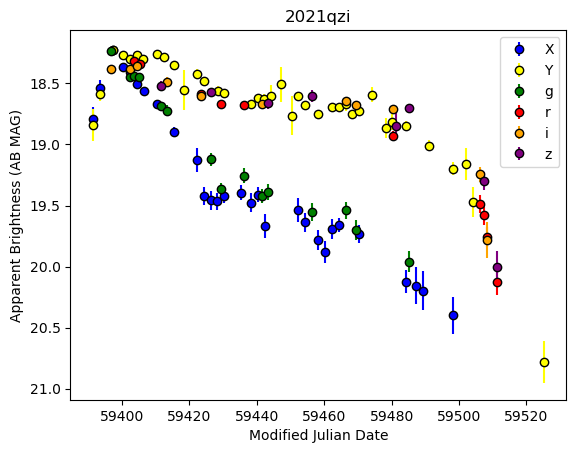

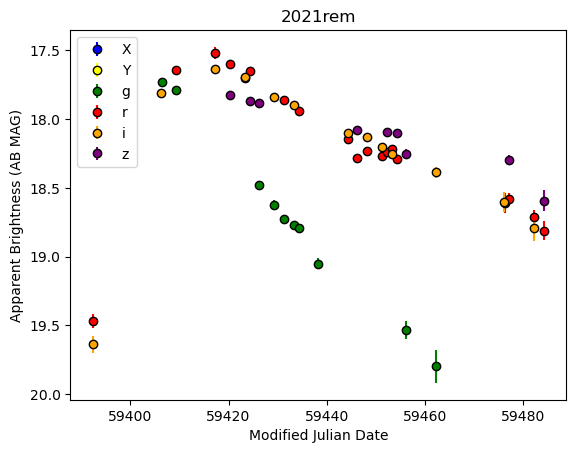

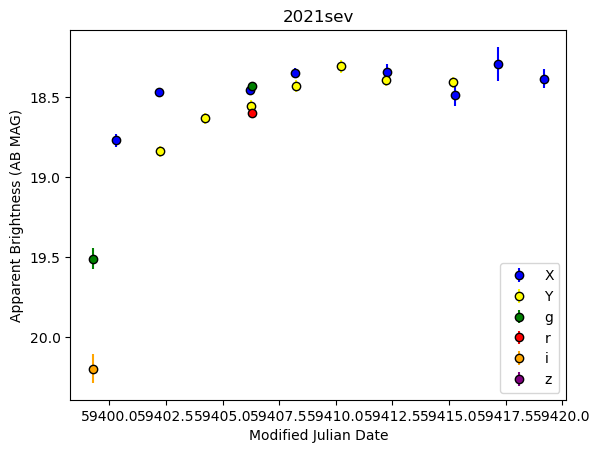

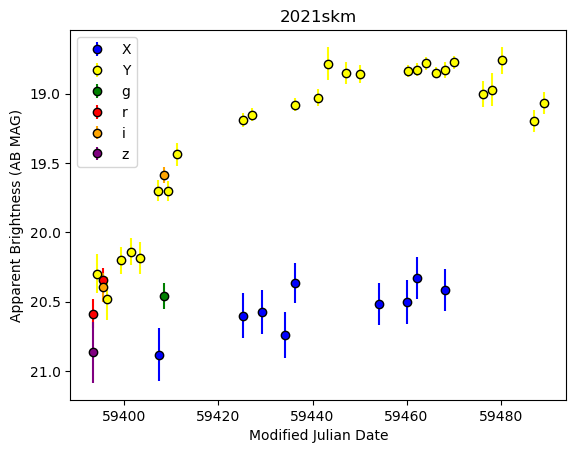

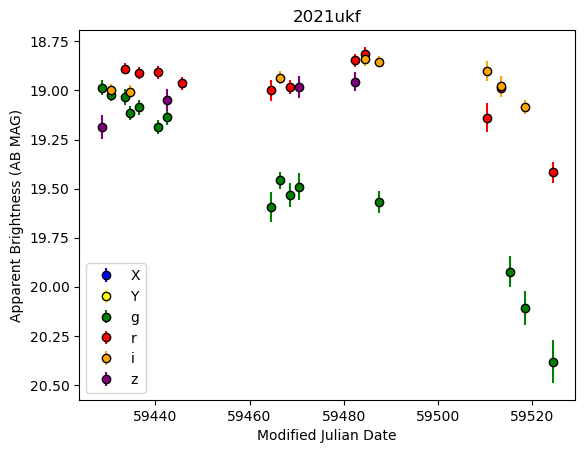

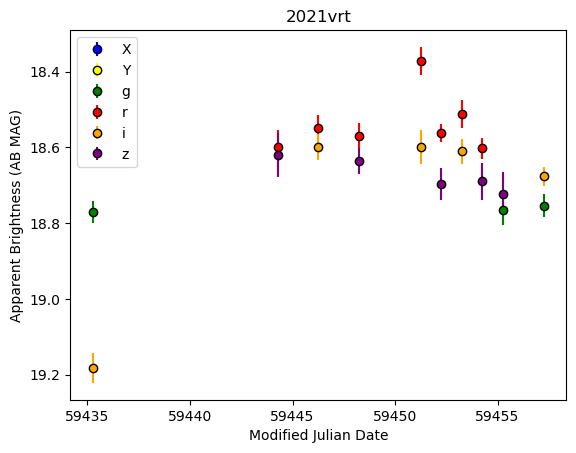

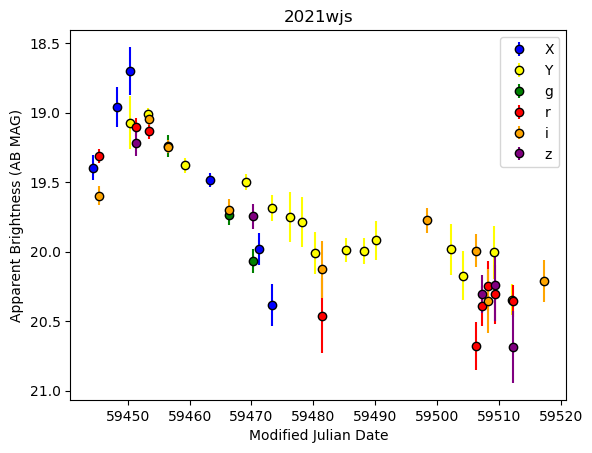

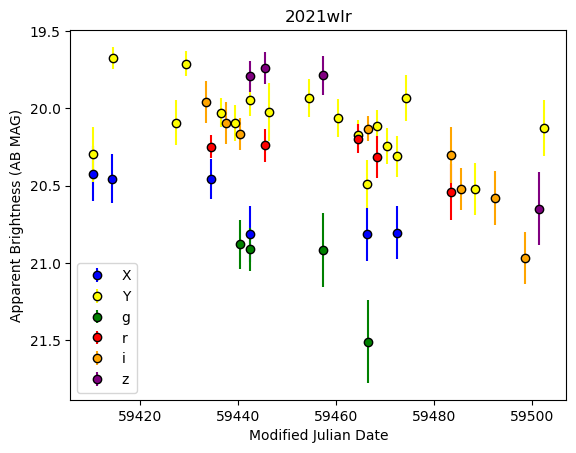

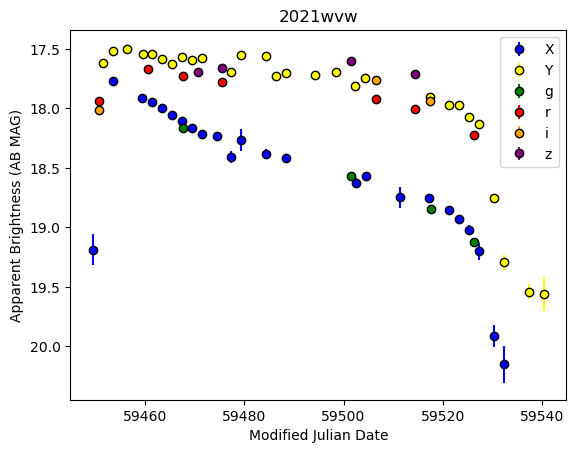

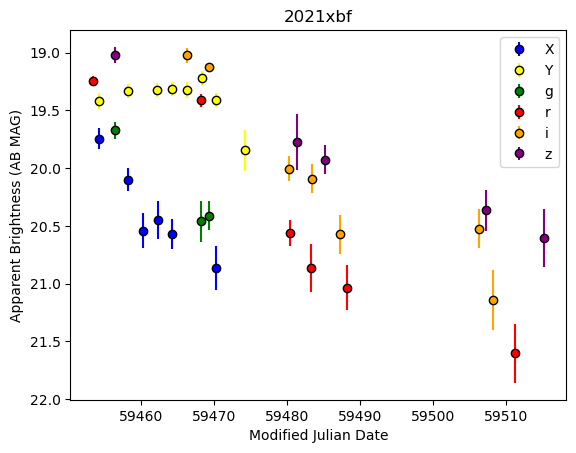

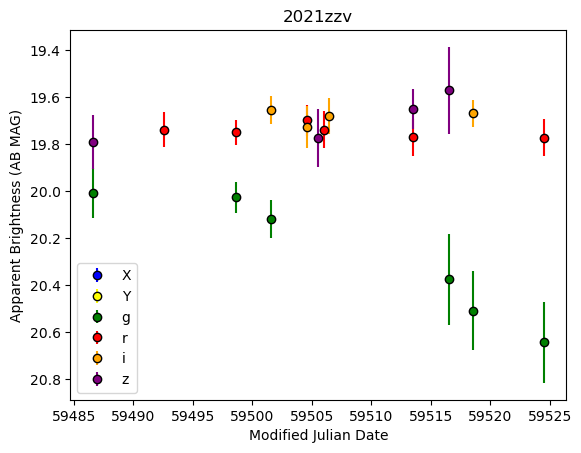

In [8]:
for idx, df in enumerate(full_df_list):
    if full_snid_list[idx] in first_cut:
        plt.figure(idx)
        colors = {'X':'blue', 'Y':'yellow', 'g':'green', 'r':'red', 'i':'orange', 'z':'purple'}
        PAN = {}
        ZTF = {}
        for i, filt in enumerate(['X', 'Y']):
            mask = df['PASSBAND'] == filt
            upperlim = df['MAGERR'] < .2
            mask = mask & upperlim
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            ZTF[filt] = l
        for i, filt in enumerate(['g', 'r', 'i', 'z']):
            mask = df['PASSBAND'] == filt
            upperlim = df['MAGERR'] < .2
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            PAN[filt] = l
        plt.gca().invert_yaxis()
        plt.title(full_snid_list[idx])
        plt.xlabel('Modified Julian Date')
        plt.ylabel('Apparent Brightness (AB MAG)')
        plt.legend()